<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_predictionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the stock price movement of American Express.

* We are using the stock data for American Express from the year 1972 to 2020 and try to predict the closing price for 30 days.

* Closing Price is the last price at which a stock trades during a regular trading session.

# Importing required libraries

In [211]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

# Data Exploration

In [212]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [213]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [214]:
# We take a look at the last rows of our dataset
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12059,2020-03-26,92.239998,99.690002,90.839996,93.290001,92.774651,9459400.0
12060,2020-03-27,87.940002,91.970001,85.820000,88.730003,88.239845,6999800.0
12061,2020-03-30,88.510002,91.389999,85.269997,90.269997,89.771332,5565000.0
12062,2020-03-31,89.940002,90.900002,85.070000,85.610001,85.137077,6075900.0
12063,2020-04-01,80.650002,81.309998,77.000000,77.839996,77.409996,8307600.0


In [215]:
# We check the datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [216]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df.pop("Date")

In [217]:
df = df[["Close"]]

In [218]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [219]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


# Data Visualization

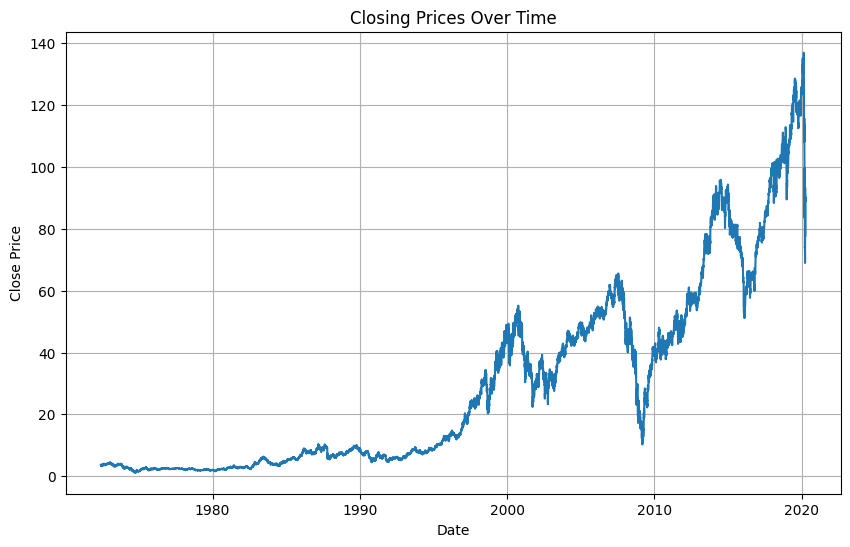

In [220]:
#Visualizing the closing price from 1972 until 2020
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Data Preparation

###Spliting the data to Training and Test data
####Importing MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and

In [221]:
#For preprocessing
from sklearn.preprocessing import MinMaxScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse

In [222]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.65639501],
       [0.62207872],
       [0.56486027]])

In [223]:
#To see the scaled data in a DF format, we create a new DF using the scaled values.
#Create a new DataFrame with the scaled values and original dates in the index
scaled_df = pd.DataFrame(df1, index = df.index, columns = ["Scaled_Close"])
scaled_df.head()

,Scaled_Close
Date,
1972-06-01,0.018843
1972-06-02,0.018724
1972-06-05,0.018191
1972-06-06,0.016769
1972-06-07,0.016473


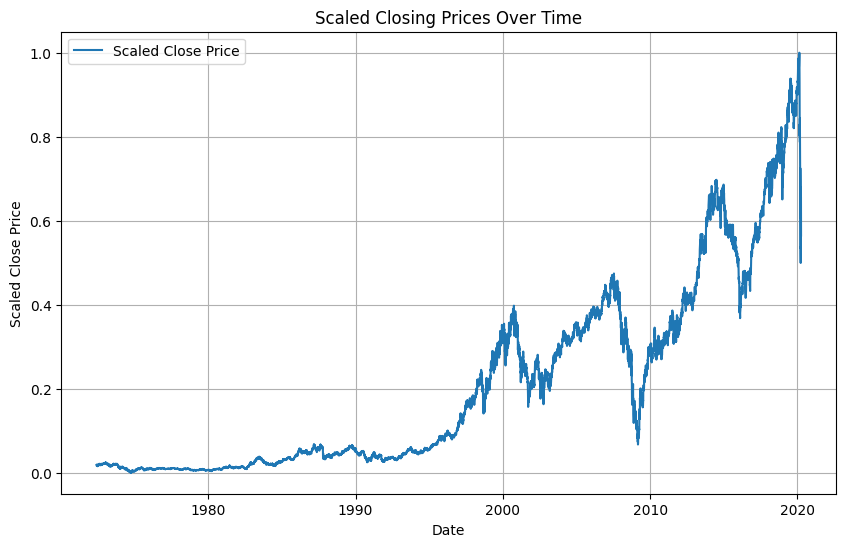

In [224]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_df.index, scaled_df["Scaled_Close"], label="Scaled Close Price")
plt.title('Scaled Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
#Splitting dataset into train and test sets.
#Determining Training Size: 80% of the total dataset length
training_size = int(len(df1)*0.8)

#Determining Test Size: remaining 20% of the total dataset length
test_size = len(df1)-training_size

In [226]:
#Inspecting the sizes of our training and test sets
print ("Training Size: ", training_size)
print ("Test Size: ", test_size)

Training Size:  9651
Test Size:  2413


In [227]:
# Splitting Dataset: train_data contains the first training_size rows of the scaled data, and test_data contains the remaining rows.
train_data,test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [228]:
#Checking the  length (number of rows) in our training and test set

print("Length of Training Data:", len(train_data))
print("Length of Test Data:", len(test_data))


Length of Training Data: 9651
Length of Test Data: 2413


In [229]:
#Inspecting the train data as NumPy array
train_data

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.28421762],
       [0.29290716],
       [0.28539586]])

# Preparing the data for LSTM
* Convert the data to numpy array and set the timestep to 100
* Converting the time series array into input-output pairs for an autoregressive model.
* time_step (int): The number of time steps to use for each input sequence.
* Returns: A tuple containing NumPy arrays (X, Y), where X is the input sequence matrix and Y is the target values array.

In [230]:
def create_AR(stock_data, time_step=1):
	X, Y = [], []
	for i in range(len(stock_data)-time_step):
		a = stock_data[i:(i+time_step), 0]
		X.append(a)
		Y.append(stock_data[i+time_step,0])
	return np.array(X), np.array(Y)

In [231]:
#applying the create_AR function to create input-output pairs for our training and test sets with a time step = 100 ()
time_step = 100
X_train, y_train = create_AR(train_data, time_step)
X_test, y_test = create_AR(test_data, time_step)

In [232]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (9551, 100)
Shape of y_train: (9551,)


In [233]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (2313, 100)
Shape of y_test: (2313,)


In [234]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Build the Model
* Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [235]:
### Creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["mean_absolute_error"])

modelresult = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25, batch_size=64,verbose=1)


Epoch 1/25
150/150 [==============================] - 9s 24ms/step - loss: 0.0019 - mean_absolute_error: 0.0212 - val_loss: 0.0074 - val_mean_absolute_error: 0.0666
Epoch 2/25
150/150 [==============================] - 3s 21ms/step - loss: 2.8255e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0047 - val_mean_absolute_error: 0.0542
Epoch 3/25
150/150 [==============================] - 3s 21ms/step - loss: 2.2926e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0066 - val_mean_absolute_error: 0.0685
Epoch 4/25
150/150 [==============================] - 2s 16ms/step - loss: 2.2617e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0059 - val_mean_absolute_error: 0.0672
Epoch 5/25
150/150 [==============================] - 3s 17ms/step - loss: 1.9311e-04 - mean_absolute_error: 0.0090 - val_loss: 0.0061 - val_mean_absolute_error: 0.0700
Epoch 6/25
150/150 [==============================] - 3s 17ms/step - loss: 1.8948e-04 - mean_absolute_error: 0.0091 - val_loss: 0.0012 - val_mean_absolute_erro

In [236]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_18 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_19 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 32)               

# Model Evaluation

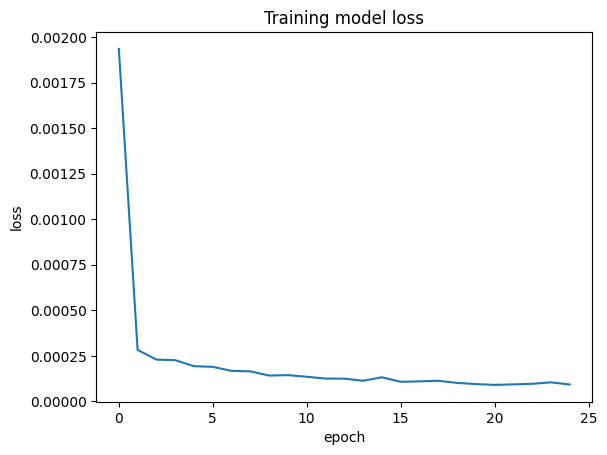

In [237]:
plt.plot(modelresult.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [238]:
#predicted stock price on train and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

73/73 [==============================] - 0s 6ms/step


In [239]:
#Inverse transform to get actual value
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

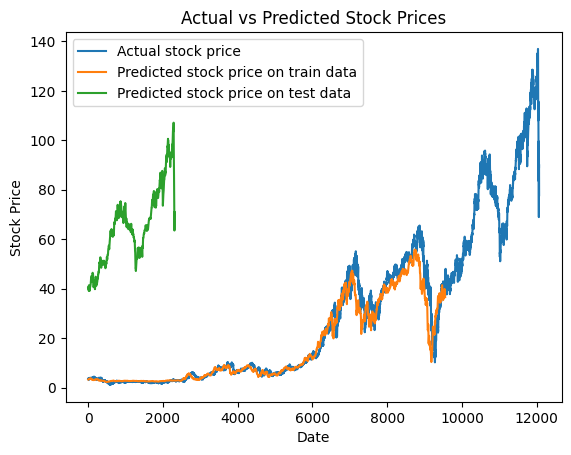

In [240]:
plt.plot(scaler.inverse_transform(df1), label = "Actual stock price")
plt.plot(train_pred, label = "Predicted stock price on train data")
plt.plot(test_pred, label = "Predicted stock price on test data")

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [241]:
#appending train and test pred
test = np.vstack((train_pred, test_pred))

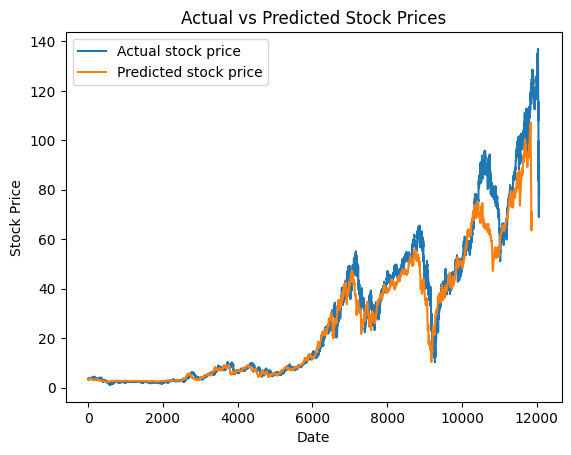

In [242]:
#Combining the predicted data to create uniform data visualization
plt.plot(scaler.inverse_transform(df1), label = "Actual stock price")
plt.plot(test, label = "Predicted stock price")

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# Forecasting Stock price for the next 30 days

In [243]:
#we  take the latest 100 values, create a data to get the predicted value
len(test_data)

2413

In [244]:
#Extracting the last 100 days from the test data; 2313 is the starting index for the last 100 days
pred_inp = test_data[len(test_data)-100:]

In [245]:
pred_inp = pred_inp.reshape(1,-1)

In [246]:
inp_list = list(pred_inp)

In [247]:
pred_inp.shape

(1, 100)

In [248]:
#Creating list of the last 100 data
inp_list = inp_list[0].tolist()

In [249]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window method (algorithm) with stride 1 (we shift by 1 to have 101 values)
pred_output=[]
n_steps=100
i=0
while(i<30): # we repeat it 30 time (sliding window algorith)

    if(len(inp_list)>100):
        pred_inp = np.array(inp_list[1:])
        pred_inp = pred_inp.reshape(1,-1)
        pred_inp = pred_inp.reshape((1, n_steps, 1))
        future_stock = model.predict(pred_inp, verbose=0)
        inp_list.extend(future_stock[0].tolist())
        inp_list = inp_list[1:]
        pred_output.extend(future_stock.tolist())
        i=i+1
    else:
        pred_inp = pred_inp.reshape((1, n_steps,1))
        future_stock = model.predict(pred_inp, verbose=0)
        inp_list.extend(future_stock[0].tolist())
        pred_output.extend(future_stock.tolist())
        i=i+1


print(pred_output)

[[0.5143021941184998], [0.5028027892112732], [0.4868643879890442], [0.4682690501213074], [0.44954049587249756], [0.4321870803833008], [0.4169028401374817], [0.40383315086364746], [0.3928062915802002], [0.38350343704223633], [0.37556707859039307], [0.36865925788879395], [0.362488329410553], [0.3568170666694641], [0.3514605760574341], [0.34628158807754517], [0.3411838412284851], [0.3361051678657532], [0.33101052045822144], [0.32588624954223633], [0.3207336664199829], [0.31556427478790283], [0.31039565801620483], [0.305248498916626], [0.30014389753341675], [0.295102059841156], [0.29014116525650024], [0.2852770686149597], [0.28052276372909546], [0.27588897943496704]]


In [250]:
len(pred_output)

30

In [251]:
len(inp_list)

101

In [252]:
print(pred_inp)

[[[0.91089546]
  [0.9178176 ]
  [0.90839167]
  [0.91023267]
  [0.91516661]
  [0.91354651]
  [0.90699254]
  [0.90839167]
  [0.91840674]
  [0.90920172]
  [0.90522514]
  [0.90043857]
  [0.91612391]
  [0.9328402 ]
  [0.92893728]
  [0.9382159 ]
  [0.94013062]
  [0.94764195]
  [0.95301765]
  [0.96016075]
  [0.95287034]
  [0.95993984]
  [0.95905608]
  [0.98659755]
  [0.95368038]
  [0.96700924]
  [0.96133891]
  [0.97267956]
  [0.94801006]
  [0.95633143]
  [0.96259089]
  [0.97547792]
  [0.97290047]
  [0.96236998]
  [0.96546286]
  [0.96833482]
  [0.97282687]
  [0.98181098]
  [0.99219416]
  [0.99020596]
  [1.        ]
  [0.99742266]
  [0.98505105]
  [0.93563857]
  [0.88195488]
  [0.86428122]
  [0.82237995]
  [0.8011716 ]
  [0.83018585]
  [0.7870327 ]
  [0.84366195]
  [0.80860928]
  [0.7887264 ]
  [0.71545445]
  [0.75234819]
  [0.69402514]
  [0.60676155]
  [0.7251013 ]
  [0.62399338]
  [0.62922182]
  [0.53474147]
  [0.55919001]
  [0.53746618]
  [0.49946783]
  [0.61059087]
  [0.65565862]
  [0.67863

In [253]:
len(df1)

12064

In [254]:
#Creating a empty plot graph one after another
plot_new=np.arange(1,101) # first 100 value  - train data
plot_pred=np.arange(101,131) # predict value for the next 30 days

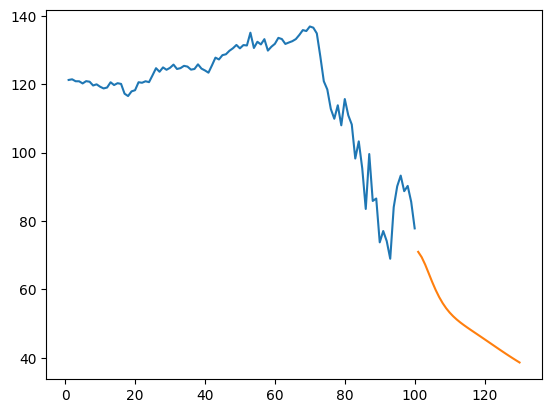

In [255]:
plt.plot(plot_new, scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(plot_pred, scaler.inverse_transform(pred_output))

In [256]:
ds_new = df1.tolist()

In [257]:
len(ds_new)

12064

In [258]:
#Extends helps us to fill the missing value with approx value
ds_new.extend(pred_output)

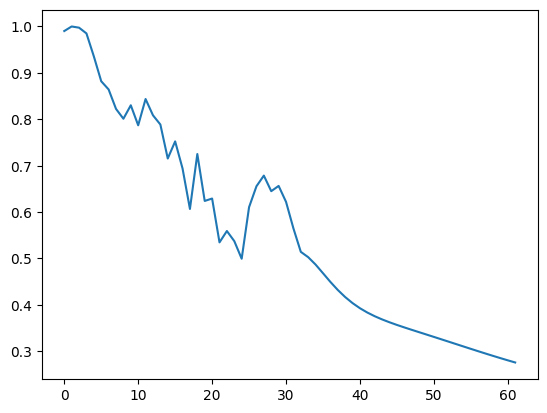

In [264]:
plt.plot(ds_new[12032:])

In [260]:
#Creating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()

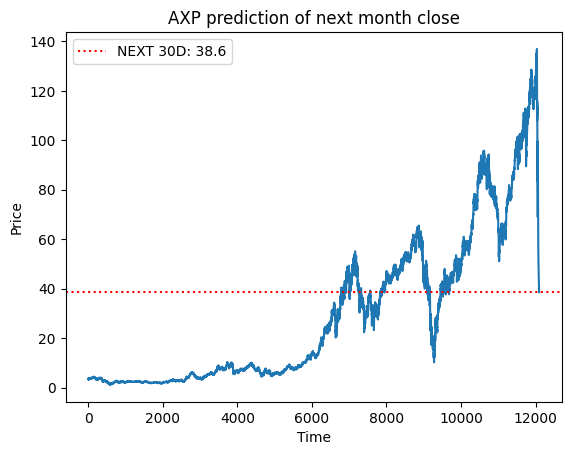

In [261]:
#Plotting final results with predicted value after 30 Days

stock_symbol = "AXP"
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month close".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [262]:
print(train_pred[:5])
print(test_pred[:5])

[[3.3055139]
 [3.3274863]
 [3.3541481]
 [3.381374 ]
 [3.40599  ]]
[[40.6786  ]
 [40.720665]
 [40.697582]
 [40.596706]
 [40.448704]]


In [263]:
# Evaluate Performance metrics
# Calculate and print additional performance metrics such as RMSE, Mean Absolute Error (MAE), or others, depending on your preference.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("Train RMSE: %.2f" % train_rmse)
print("Test RMSE: %.2f" % test_rmse)
print("Train MAE: %.2f" % train_mae)
print("Test MAE: %.2f" % test_mae)


Train RMSE: 22.28
Test RMSE: 66.78
Train MAE: 15.95
Test MAE: 65.02
